In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

"""
This notebook contains miscelleaneous plots for 
explaining the idea and illustrations in a publication.
"""

import sys
import os
import matplotlib.pyplot as plt

sys.path.append('../')
sys.path.append('../paretoviz')
from paretoviz import plotting as pplt
from paretoviz import decorator as dcor
from paretoviz.utils import fmt
from paretoviz.utils import vectorops as vops
from paretoviz.decorator import Arrow3D

# we are using arrows for this data 
rawfpath = "../data/knee/knee-3d.out"
# rawfpath = "../data/knee-const/knee-const-3d.out"

# do visualization based on distance from the centroid?
docentroid = False

# get the path and filename from the rawfpath
path, rawfile = os.path.split(rawfpath)
# get the prefix
prefix = rawfile.split('.')[0]

# load the normalized points
points = fmt.load(os.path.join(path, prefix + "-norm.out"))
# load the normalized trade-off values
mu = [v[0] if len(v) == 1 else v for v in \
        fmt.load(os.path.join(path, prefix + "-norm-mu.out"))]

# load the CV values
cvfpath = os.path.join(path, prefix + "-cv.out")
if not docentroid and os.path.exists(cvfpath):
    cv = [v[0] if len(v) == 1 else v for v in fmt.load(cvfpath)]
    [low, up] = vops.get_bound(cv)
    cv = vops.normalize(cv, low, up)
    color = dcor.recolor_by_cv(cv)
else:
    color = dcor.recolor_by_centroid(points)

# resize the points w.r.t. trade-offs
size = dcor.rescale_by_tradeoff(mu)
(color, knee_idx) = dcor.recolor_by_tradeoff(size, color)

# alpha values
alpha = [0.2, 0.8] # alpha for plots with knee
# alpha = [1.0, 1.0] # alpha for general case

path, rawfname = os.path.split(rawfpath)

<IPython.core.display.Javascript object>


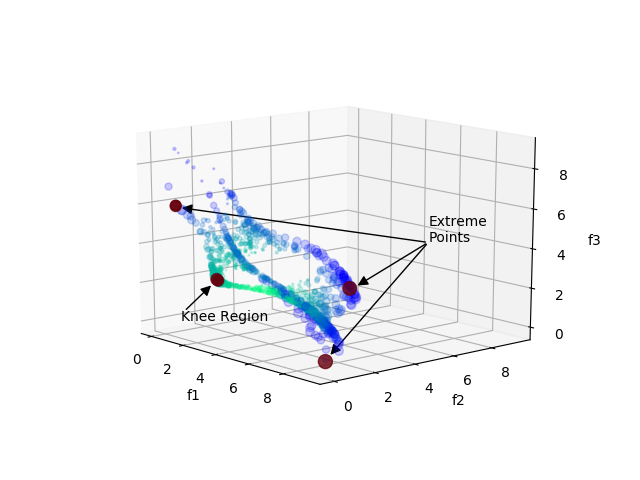

In [2]:
# use the original obj values for scatter plot.
rawpoints = fmt.load(rawfpath)
# do the scatter plot
(fig, ax) = pplt.scatter(rawpoints, s = size, c = color, alpha = alpha, \
                camera = dcor.cam_scatter[prefix], knee_idx = knee_idx)

# Put some texts and arrows
if prefix == "knee-3d":
    ax.text(1.0, 0.0, 0.25, "Knee Region")
    a = Arrow3D([1.1, 1.35], [0.1, 1.35], [0.75, 2.0], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
    #
    ax.text(7.25, 7.25, 4.25, "Extreme\nPoints")
    a = Arrow3D([7.25, 9.25], [7.25, 0.45], [4.25, 0.25], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
    a = Arrow3D([7.25, 0.75], [7.25, 9.25], [4.25, 0.25], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
    a = Arrow3D([7.25, 0.45], [7.25, 0.45], [4.25, 5.85], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
elif prefix == "knee-const-3d":
    ax.text(1.50, 2.0, 2.75, "Knee Region")
    a = Arrow3D([1.50, 1.45], [2.25, 1.65], [2.70, 2.25], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)

# save the scatter plot
scatterfpath = os.path.join(path, prefix + "-scatter-knee-marked.pdf")
plt.savefig(scatterfpath, transparent = False)

plt.show()

<IPython.core.display.Javascript object>


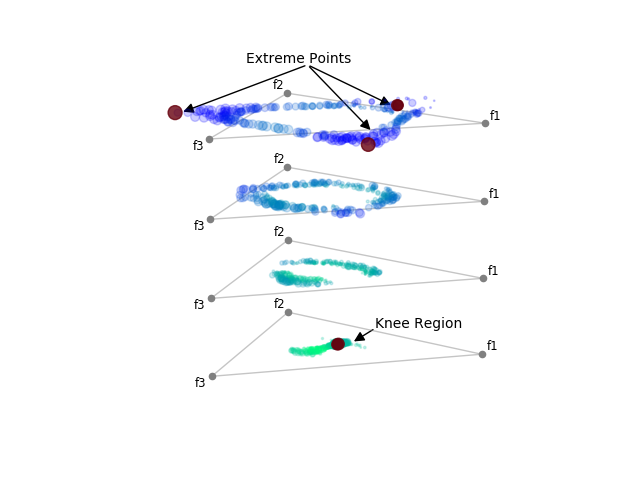

In [3]:
palette_coords = fmt.load(os.path.join(path, prefix + "-norm-palette-invsc.out"))

# do the paletteviz plot
(fig, ax) = pplt.paletteviz(palette_coords, dim = len(points[0]), \
            s = size, c = color, alpha = alpha, \
            camera = dcor.cam_palette[prefix], knee_idx = knee_idx)

# Put some texts and arrows
if prefix == "knee-3d":
    ax.text(-0.45, -0.25, 0.75, "Extreme Points")
    a = Arrow3D([-0.1, 0.50], [-0.1, -0.85], [0.70, 0.15], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
    a = Arrow3D([-0.1, -0.95], [-0.1, 0.0], [0.70, 0.0], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
    a = Arrow3D([-0.1, 0.3], [-0.1, 0.5], [0.70, 0.0], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
    ax.text(0.25, 0.25, -2.85, "Knee Region")
    a = Arrow3D([0.25, 0.125], [0.25, 0.125], [-2.85, -3.0], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
elif prefix == "knee-const-3d":
    ax.text(0.3, 0.75, -2.75, "Knee Region")
    a = Arrow3D([0.3, 0.16], [0.75, 0.25], [-2.75, -2.85], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)    

# save the paletteviz plot
fig.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, wspace = 0, hspace = 0)
palettefpath = os.path.join(path, prefix + "-norm-palette-invsc-knee-marked.pdf")
plt.savefig(palettefpath, transparent = False, bbox_inches = 'tight', pad_inches = 0)

plt.show()